# signature

In [1]:
import seaborn as sns
import pandas as pd
from function_repo import predict_similarity, display_signature_comparison, classify_similarity_label, classify_similarity, model_init 
from function_repo import contrastive_loss, create_base_network, euclidean_distance, show_performance

In [2]:
model = model_init()

2024-09-22 22:49:44.988661: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-09-22 22:49:44.988690: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-22 22:49:44.988695: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-22 22:49:44.988757: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-22 22:49:44.988777: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2024-09-22 22:49:45.932936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


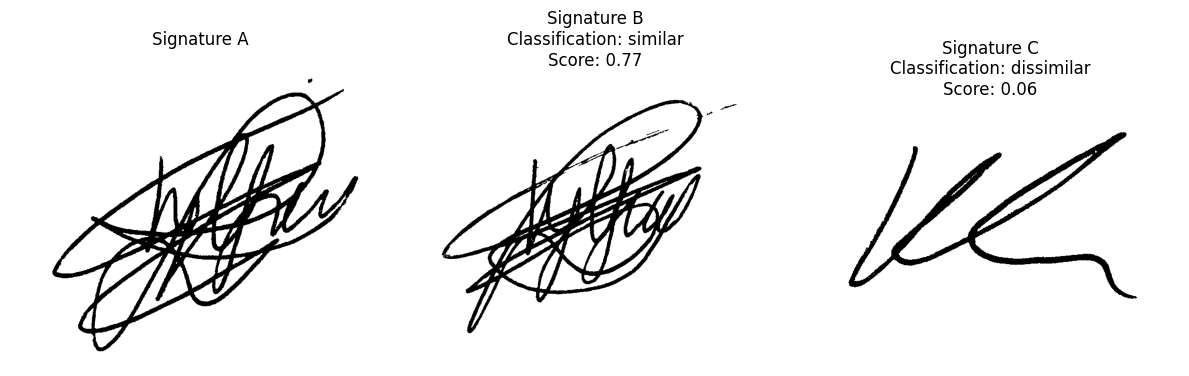

In [3]:
img1 =   "./data/genuine_signatures/person1/genuine (1).png"
img1_1 = "./data/genuine_signatures/person1/genuine (2).png"
img2 =   "./data/genuine_signatures/person3/genuine (3).png"

display_signature_comparison(img1, img1_1, img2, model)

## éval global

In [4]:

df = pd.read_csv('signature_pairs.csv', sep=";")
sample_1 = df[df['label'] == 1].sample(n=250, random_state=0)
sample_0 = df[df['label'] == 0].sample(n=250, random_state=0)
df = pd.concat([sample_1, sample_0])

In [5]:
df['score'] = df.apply(lambda row: predict_similarity(row['image_1'], row['image_2'], model), axis=1)
df['prediction'] = df.apply(lambda row: classify_similarity(row['score']), axis=1)
df.head()

,image_1,image_2,label,score,prediction
981,./data/genuine_signatures/009/009_21.PNG,./data/genuine_signatures/009/009_12.PNG,1,0.614368,1
683,./data/genuine_signatures/014/014_07.PNG,./data/genuine_signatures/014/014_23.PNG,1,0.403973,0
195,./data/genuine_signatures/015/015_10.PNG,./data/genuine_signatures/015/015_01.PNG,1,0.816131,1
1158,./data/genuine_signatures/009/009_07.PNG,./data/genuine_signatures/009/009_10.PNG,1,0.829180,1
1553,./data/genuine_signatures/006/006_11.PNG,./data/genuine_signatures/006/006_05.PNG,1,0.810828,1


In [6]:
matrice = pd.crosstab(df['label'], df['prediction'], rownames=['Classe réelle'], colnames=['Classe prédite'])
matrice

Classe prédite,0,1
Classe réelle,,
0,5,0
1,1,4


In [7]:
show_performance(matrice)

Précision (Accuracy) : 0.9000
Précision positive (Precision) : 0.8000
Rappel (Recall) : 1.0000
Score F1 : 0.8889


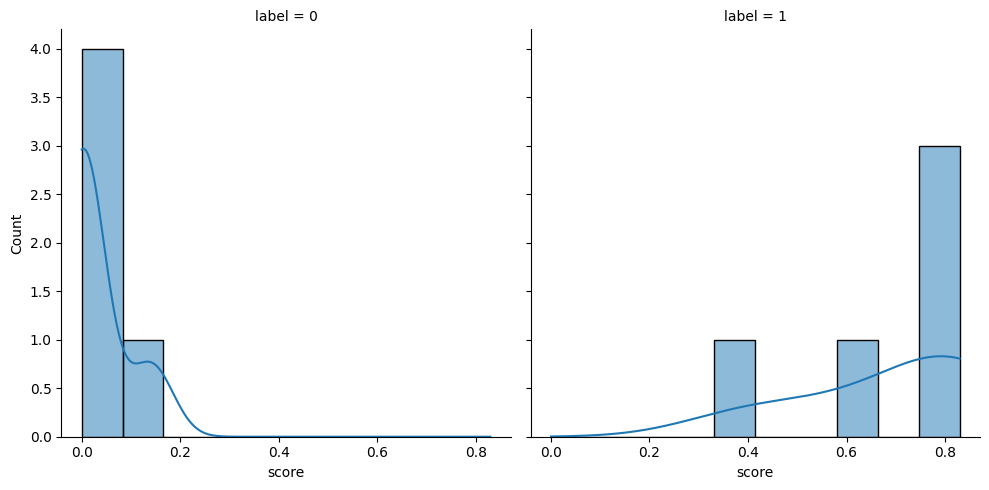

In [12]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.displot(data=df, x='score', col='label', kde=True, bins=10);